In [3]:
import pandas as pd

df_anger = pd.read_csv('AngerData.csv', sep="\t", header=0 )
df_anger.head()

df_fear = pd.read_csv('FearData.csv', sep="\t", header=0 )
df_fear.head()

df_joy = pd.read_csv('JoyData.csv', sep="\t", header=0 )
df_joy.head()

df_love = pd.read_csv('LoveData.csv', sep="\t", header=0 )
df_love.head()

df_neutral = pd.read_csv('NeutralData.csv', sep="\t", header=0 )
df_neutral.head()

df_sad = pd.read_csv('SadData.csv', sep="\t", header=0 )
df_sad.head()

df_combined = pd.concat([df_anger, df_fear, df_joy, df_love, df_neutral, df_sad])
df_combined['Label'].unique()

df_combined.to_csv('combined2_data.csv', index=False)

In [4]:
df_prepro = df_combined.copy()
df_prepro.head()

,Tweet,Label
0,pagi2 udah di buat emosi :),Anger
1,"kok stabilitas negara, memange 10 thn negara t...",Anger
2,dah lah emosi mulu liat emyu,Anger
3,"aib? bodoh benar! sebelum kata aib itu muncul,...",Anger
4,dih lu yg nyebelin bego,Anger


In [5]:
df_prepro.isnull().sum()

Tweet    0
Label    0
dtype: int64

In [6]:
# karena tidak ada NaN, maka bisa langsung gunakan str.strip() untuk menghapus spasi, enter, tab dipinggir
overspace = df_prepro['Tweet'].str.strip() == ""
overspace.sum()

np.int64(0)

In [7]:
before = len(df_prepro)

df_prepro = df_prepro.drop_duplicates(subset=["Tweet", "Label"]).reset_index(drop=True)

after = len(df_prepro)

print("Sebelum :", before)
print("Sesudah :", after)
print("Terhapus :", before - after)

Sebelum : 7080
Sesudah : 7028
Terhapus : 52


In [24]:
import re

URL_RE     = re.compile(r"(https?://\S+|www\.\S+)", re.IGNORECASE)
MENTION_RE = re.compile(r"@\w+")
HASHTAG_RE = re.compile(r"#(\w+)")   # catch teks setelah hashtag
SPACE_RE   = re.compile(r"\s+")

def clean(text):
    text = str(text).lower()
    text = URL_RE.sub(" ", text)          # hapus url
    text = MENTION_RE.sub(" ", text)      # hapus @mention
    text = HASHTAG_RE.sub(r"\1", text)    # hapus tanda hashtag
    text = SPACE_RE.sub(" ", text).strip()
    return text

# APPLY FUNCTION
df_prepro["text"] = df_prepro["Tweet"].apply(clean)

# CHECKING BEFORE-AFTER
df_prepro[["text", "Tweet"]].head(7)

,text,Tweet
0,pagi2 udah di buat emosi :),pagi2 udah di buat emosi :)
1,"kok stabilitas negara, memange 10 thn negara t...","kok stabilitas negara, memange 10 thn negara t..."
2,dah lah emosi mulu liat emyu,dah lah emosi mulu liat emyu
3,"aib? bodoh benar! sebelum kata aib itu muncul,...","aib? bodoh benar! sebelum kata aib itu muncul,..."
4,dih lu yg nyebelin bego,dih lu yg nyebelin bego
5,"asli malu maluin org indo tolol yg rep latah ""...","asli malu maluin org indo tolol yg rep latah ""..."
6,drama abg tolol,drama abg tolol


In [25]:
def clean_emoji(text):
    text = re.sub(r"([a-z]+)2\b", r"\1", text)
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# APPLY
df_prepro["text"] = df_prepro["text"].apply(clean_emoji)

# CHECKING BEFORE-AFTER
df_prepro[["text", "Tweet"]].head(7)

,text,Tweet
0,pagi udah di buat emosi,pagi2 udah di buat emosi :)
1,kok stabilitas negara memange 10 thn negara td...,"kok stabilitas negara, memange 10 thn negara t..."
2,dah lah emosi mulu liat emyu,dah lah emosi mulu liat emyu
3,aib bodoh benar sebelum kata aib itu muncul te...,"aib? bodoh benar! sebelum kata aib itu muncul,..."
4,dih lu yg nyebelin bego,dih lu yg nyebelin bego
5,asli malu maluin org indo tolol yg rep latah c...,"asli malu maluin org indo tolol yg rep latah ""..."
6,drama abg tolol,drama abg tolol


In [27]:
mask_empty = df_prepro["text"].str.strip().eq("")
print("Kosong setelah cleaning:", mask_empty.sum())
df_prepro = df_prepro[~mask_empty].reset_index(drop=True)

Kosong setelah cleaning: 0


In [28]:
TEXT_COL  = "text"
LABEL_COL = "Label"

In [30]:
# Tokenisasi sederhana untuk EDA
def simple_tokenize(text):
    return text.split()

df_prepro["tokens"] = df_prepro[TEXT_COL].apply(simple_tokenize)

In [32]:
from collections import Counter
import pandas as pd

def dominant_words_by_label(df, label_col, token_col, top_n=20):
    result = {}
    for label in df[label_col].unique():
        tokens = []
        subset = df[df[label_col] == label]
        for row in subset[token_col]:
            tokens.extend(row)
        counter = Counter(tokens)
        result[label] = counter.most_common(top_n)
    return result

dominant = dominant_words_by_label(
    df_prepro,
    LABEL_COL,
    "tokens",
    top_n=20
)

dominant

{'Anger': [('yg', 285),
  ('banget', 214),
  ('gue', 208),
  ('marah', 188),
  ('ga', 179),
  ('di', 173),
  ('aja', 171),
  ('aku', 165),
  ('suka', 164),
  ('orang', 160),
  ('emosi', 157),
  ('yang', 149),
  ('sama', 145),
  ('ya', 143),
  ('ini', 141),
  ('tolol', 139),
  ('bodoh', 136),
  ('dan', 136),
  ('kalo', 126),
  ('dia', 124)],
 'Fear': [('takut', 460),
  ('aku', 155),
  ('ga', 124),
  ('gue', 124),
  ('banget', 121),
  ('ada', 114),
  ('ngeri', 113),
  ('di', 110),
  ('tapi', 110),
  ('malu', 109),
  ('kaget', 104),
  ('ya', 101),
  ('kalo', 99),
  ('yg', 91),
  ('aja', 83),
  ('bgt', 80),
  ('mau', 80),
  ('lagi', 80),
  ('ini', 77),
  ('sama', 77)],
 'Joy': [('semangat', 491),
  ('banget', 217),
  ('ini', 206),
  ('enak', 197),
  ('aku', 191),
  ('dan', 191),
  ('ya', 190),
  ('pagi', 148),
  ('yang', 139),
  ('suka', 137),
  ('yg', 132),
  ('hari', 126),
  ('bahagia', 124),
  ('sama', 119),
  ('di', 116),
  ('ada', 105),
  ('semoga', 104),
  ('kabar', 103),
  ('buat', 

In [33]:
#untuk membuat visualisasi kata dominan
!pip -q install wordcloud 

In [35]:
from wordcloud import WordCloud
import os

TEXT_COL  = "text"
LABEL_COL = "Label"

# stopword ringan (EDA-only)
eda_stopwords = {
    "yg","yang","dan","di","ke","dari","aku","gue","ya","ga","aja","ini","itu",
    "ada","sama","kalo","tapi","bisa","jadi","dia","saja","udah","buat","lagi"
}

# folder output
out_dir = "wordcloud_all_labels"
os.makedirs(out_dir, exist_ok=True)

saved_files = []

for label in sorted(df_combined[LABEL_COL].unique()):
    text_all = " ".join(
        df_prepro.loc[df_prepro[LABEL_COL] == label, TEXT_COL]
        .astype(str)
        .tolist()
    )

    wc = WordCloud(
        width=1200,
        height=600,
        background_color="white",
        stopwords=eda_stopwords,
        collocations=False
    ).generate(text_all)

    path = os.path.join(out_dir, f"wordcloud_{label}.png")
    wc.to_file(path)
    saved_files.append(path)

saved_files

['wordcloud_all_labels\\wordcloud_Anger.png',
 'wordcloud_all_labels\\wordcloud_Fear.png',
 'wordcloud_all_labels\\wordcloud_Joy.png',
 'wordcloud_all_labels\\wordcloud_Love.png',
 'wordcloud_all_labels\\wordcloud_Neutral.png',
 'wordcloud_all_labels\\wordcloud_Sad.png']

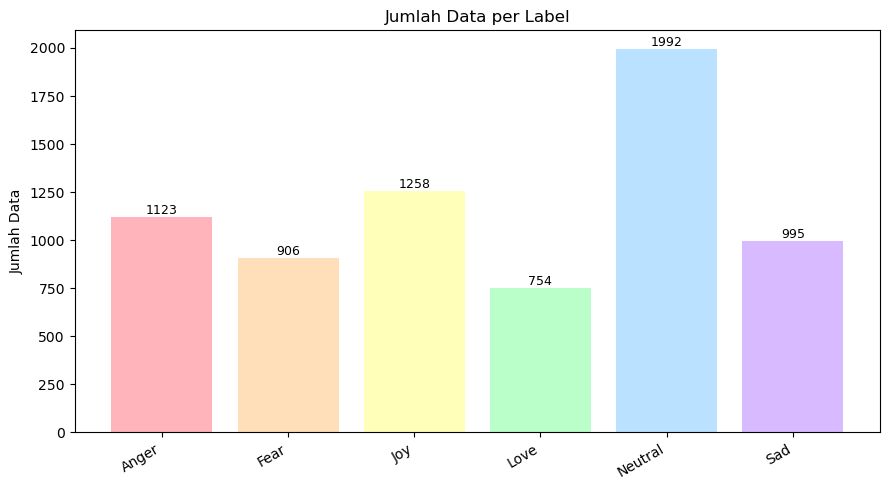

In [36]:
# Visualisasi jumlah data per label
import matplotlib.pyplot as plt

LABEL_COL = "Label"
TEXT_COL  = "text"

# palette
pastel = ["#FFB3BA", "#FFDFBA", "#FFFFBA", "#BAFFC9", "#BAE1FF", "#D7BAFF", "#FFC6FF"]

counts = df_prepro[LABEL_COL].value_counts().sort_index()

colors = [pastel[i % len(pastel)] for i in range(len(counts))]

plt.figure(figsize=(9,5))
plt.bar(counts.index, counts.values, color=colors)
for i, v in enumerate(counts.values):
    plt.text(i, v, str(v), ha="center", va="bottom", fontsize=9)
plt.title("Jumlah Data per Label")
plt.xticks(rotation=30, ha="right")
plt.ylabel("Jumlah Data")
plt.tight_layout()
plt.show()

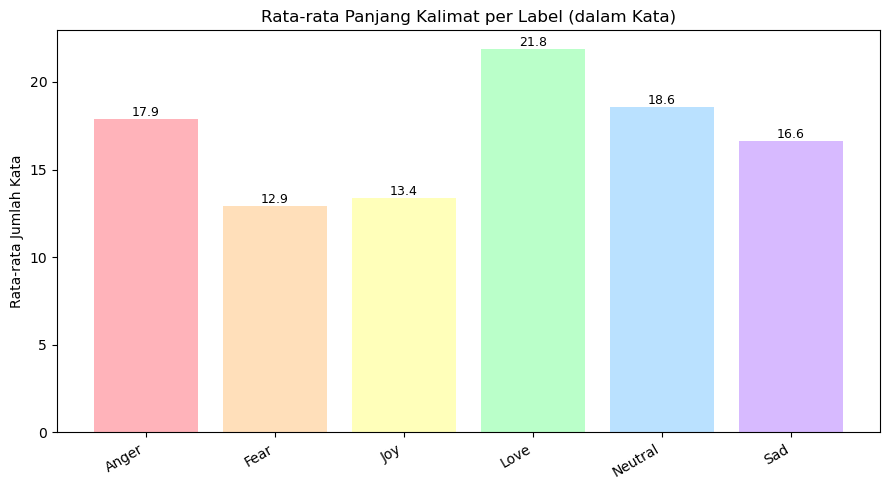

In [37]:
# hitung panjang kalimat (jumlah kata)
LABEL_COL = "Label"
TEXT_COL  = "text"

df_prepro["len_words"] = df_prepro[TEXT_COL].astype(str).apply(lambda x: len(x.split()))

avg_len = df_prepro.groupby(LABEL_COL)["len_words"].mean().sort_index()

colors2 = [pastel[i % len(pastel)] for i in range(len(avg_len))]

plt.figure(figsize=(9,5))
plt.bar(avg_len.index, avg_len.values, color=colors2)
for i, v in enumerate(avg_len.values):
    plt.text(i, v, f"{v:.1f}", ha="center", va="bottom", fontsize=9)
plt.title("Rata-rata Panjang Kalimat per Label (dalam Kata)")
plt.xticks(rotation=30, ha="right")
plt.ylabel("Rata-rata Jumlah Kata")
plt.tight_layout()
plt.show()

In [38]:
# Menambahkan kolom label_id untuk metode stratified
LABEL_COL = "Label"

# mapping label -> angka
label2id = {label: idx for idx, label in enumerate(sorted(df_prepro[LABEL_COL].unique()))}
id2label = {idx: label for label, idx in label2id.items()}

# buat kolom label_id
df_prepro["label_id"] = df_prepro[LABEL_COL].map(label2id)

# cek
print(label2id)
df_prepro[[LABEL_COL, "label_id"]].head()

{'Anger': 0, 'Fear': 1, 'Joy': 2, 'Love': 3, 'Neutral': 4, 'Sad': 5}


,Label,label_id
0,Anger,0
1,Anger,0
2,Anger,0
3,Anger,0
4,Anger,0


In [41]:
df_prepro.head()

,Tweet,Label,text,tokens,len_words,label_id
0,pagi2 udah di buat emosi :),Anger,pagi udah di buat emosi,"[pagi, udah, di, buat, emosi]",5,0
1,"kok stabilitas negara, memange 10 thn negara t...",Anger,kok stabilitas negara memange 10 thn negara td...,"[kok, stabilitas, negara, memange, 10, thn, ne...",26,0
2,dah lah emosi mulu liat emyu,Anger,dah lah emosi mulu liat emyu,"[dah, lah, emosi, mulu, liat, emyu]",6,0
3,"aib? bodoh benar! sebelum kata aib itu muncul,...",Anger,aib bodoh benar sebelum kata aib itu muncul te...,"[aib, bodoh, benar, sebelum, kata, aib, itu, m...",40,0
4,dih lu yg nyebelin bego,Anger,dih lu yg nyebelin bego,"[dih, lu, yg, nyebelin, bego]",5,0


In [42]:
df_prepro.to_csv('df_ready.csv', index=False)